In [2]:
import pandas as pd
import numpy as np

In [1]:
url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:` 
i. Create a DataFrame birds from the above dictionary data which has the index labels. 

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [3]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

df = pd.DataFrame(data,index=labels)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [185]:
df.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:` 
- i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

- ii. Select rows where the number of visits is less than 4.

In [187]:
# code here
df[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [12]:
df[df['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:` 
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [4]:
# code here
df[df['age'].isnull()][['age','visits']]
df[df.visits.isnull() | df.age.isnull()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [35]:
df.age.fillna(df.age.mode()[0],inplace=True)
df.priority.fillna(df.priority.mode()[0],inplace=True)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [39]:
df.fillna({'age':df.age.mode()[0],'priority':df.priority.mode()[0]})

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [48]:
# code here
df[df['birds']== 'Cranes']['visits'].sum()

14

In [5]:
df['birds'].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [57]:
df.duplicated().sum()

1

In [59]:
df.drop_duplicates(inplace=True)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed. 
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils' 
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams. 

In [6]:
# code here
df = pd.read_csv('IPL_Matches_2008_2022.csv')
df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [7]:
df.shape

(950, 20)

In [8]:
df['Team1'].value_counts()

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64

In [9]:
df.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
df.replace('Kings XI Punjab','Punjab Kings',inplace=True)
df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [10]:
df['Team1'].value_counts()

Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Kolkata Knight Riders          105
Rajasthan Royals                89
Sunrisers Hyderabad             69
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


In [15]:
# code here
teams = np.concatenate((df['Team1'],df['Team2']),axis=0)
pd.DataFrame(teams,columns=['All teams']).value_counts().head()

## 2method
(df['Team1'].value_counts() + df['Team2'].value_counts()).sort_values(ascending=False).head()

Mumbai Indians                 231
Royal Challengers Bangalore    226
Delhi Capitals                 224
Kolkata Knight Riders          223
Punjab Kings                   218
dtype: int64

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [28]:
# code here
player = df[(df['Team1'] == 'Mumbai Indians') | (df['Team2'] == 'Mumbai Indians')]
player = player[player['WinningTeam'] != 'Mumbai Indians']['Player_of_Match']
player.value_counts().head(1)


SPD Smith    4
Name: Player_of_Match, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [58]:
def team1_vs_team2(t1, t2):
    m1 = (df.Team1 == t1) | (df.Team2 == t1)  # Filter for matches where only t1 played
    m2 = (df.Team1 == t2) | (df.Team2 == t2)  # Filter for matches where only t1 played
    df1 = df[m1 & m2]
    print(df1.WinningTeam.value_counts())
    print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

Chennai Super Kings      17
Kolkata Knight Riders     9
Name: WinningTeam, dtype: int64
RA Jadeja    3
Name: Player_of_Match, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart. 

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<AxesSubplot:>

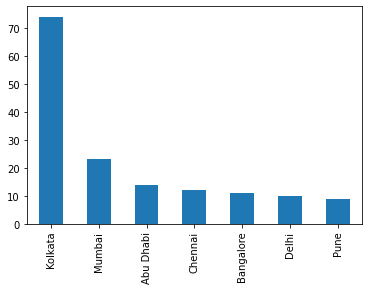

In [29]:
# code here
all_teams = df[(df['Team1'] == 'Kolkata Knight Riders') | (df['Team2'] == 'Kolkata Knight Riders') ]['City']
all_teams.value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [166]:
# code here
m_i = df[(df['Team1'] == 'Mumbai Indians') | (df['Team2'] == 'Mumbai Indians')]
m_i[m_i['Season'] == '2011']['Margin'].mean()

19.25